**Phần 1: Tải và Kiểm tra dữ liệu**

In [1]:
import pandas as pd
try:
    # Đảm bảo đường dẫn chính xác và sử dụng dấu gạch chéo xuôi (/)
    file_path = "data_dotquy.csv"
    
    # Đọc dữ liệu từ CSV vào DataFrame
    df = pd.read_csv(file_path)
    
    # Hiển thị DataFrame
    print(df)
    
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp tại đường dẫn: {file_path}. Vui lòng kiểm tra lại vị trí và tên tệp.")

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [2]:
# Kiểm tra trùng lặp
duplicated_rows = df[df.duplicated(subset='id')]
print("So luong du lieu trung lap la:" , len(duplicated_rows))

So luong du lieu trung lap la: 0


In [3]:
# iểm tra dữ liệu có bị thiếu
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Phần 2: Tiền xử lý dữ liệu**

In [4]:
# Dùng knn điền dữ liệu thiếu vào BMI
# Tạo đối tượng KNN Imputer với số lượng hàng xóm là 3
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Áp dụng imputer cho DataFrame, chỉ chọn các cột số
df[['age', 'bmi']] = imputer.fit_transform(df[['age', 'bmi']])

# Hiển thị DataFrame sau khi điền dữ liệu
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [5]:
# Kiểm tra lại đã dủ dữ liệu chưa
df['bmi'].isnull().sum()
df['bmi']

0       36.600000
1       30.466667
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.833333
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [6]:
# Xóa cột mã định danh (Không có giá trị)
df  = df.drop(columns=['id'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.466667,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.833333,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [7]:
# Loại bỏ giới tính mang giá trị Other (tránh nhiễu)
mask = df['gender'].isin(['Male', 'Female'])
df = df[mask]
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

In [8]:
# gender: female 1 male 0 (Mẫ Hóa)
df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})
print(df)

     gender   age  hypertension  heart_disease ever_married      work_type  \
0         0  67.0             0              1          Yes        Private   
1         1  61.0             0              0          Yes  Self-employed   
2         0  80.0             0              1          Yes        Private   
3         1  49.0             0              0          Yes        Private   
4         1  79.0             1              0          Yes  Self-employed   
...     ...   ...           ...            ...          ...            ...   
5105      1  80.0             1              0          Yes        Private   
5106      1  81.0             0              0          Yes  Self-employed   
5107      1  35.0             0              0          Yes  Self-employed   
5108      0  51.0             0              0          Yes        Private   
5109      1  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_sta

C:\Users\dinhn\AppData\Local\Temp\ipykernel_20692\2596878389.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})


In [9]:
# Kiểm tra xem tuổi có phải là số nguyên hay không
df['Is_Whole_Number'] = df['age'].apply(lambda x: x.is_integer())

# Lọc các hàng mà tuổi không phải là số thực (chỉ giữ lại số nguyên)
df = df[df['Is_Whole_Number']]

# Xóa cột tạm thời 'Is_Whole_Number'
df = df.drop(columns=['Is_Whole_Number'])

df

C:\Users\dinhn\AppData\Local\Temp\ipykernel_20692\4200932346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Whole_Number'] = df['age'].apply(lambda x: x.is_integer())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,30.466667,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,Private,Urban,83.75,28.833333,never smoked,0
5106,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [10]:
# Chuẩn hóa bằng Min-Max Scaling
# Chuẩn hóa cột age về khoảng giá trị [0, 1] bằng phương pháp Min-Max Scaling. Điều này giúp mô hình học máy hoạt động tốt hơn.
# Calculate min and max values
X_min = min(df['age'])
X_max = max(df['age'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['age']]

# Gán lại dữ liệu vào cột ['avg_glucose_level']
df['age'] = scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,Yes,Self-employed,Rural,202.21,30.466667,never smoked,1
2,0,0.975309,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,Yes,Private,Urban,83.75,28.833333,never smoked,0
5106,1,0.987654,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
# Chuyển trạng thái đã kết hôn về dạng 1 và chưa kết hôn về dạng 0
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,Self-employed,Rural,202.21,30.466667,never smoked,1
2,0,0.975309,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,Private,Urban,83.75,28.833333,never smoked,0
5106,1,0.987654,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


In [12]:
# Chuẩn hóa cột work_type 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['work_type'] = label_encoder.fit_transform(df['work_type'])

# sử dụng chuẩn hóa bằng Min-Max Scaling chuan hoa df['work_type'] dang (0 1 2 3 4)
# Calculate min and max values
X_min = min(df['work_type'])
X_max = max(df['work_type'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['work_type']]
scaled_data
# Tạo ra trường dữ liệu mới work_type_2
df['work_type'] =scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,0.75,Rural,202.21,30.466667,never smoked,1
2,0,0.975309,0,1,1,0.50,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,1,0.50,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,1,0.75,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,Urban,83.75,28.833333,never smoked,0
5106,1,0.987654,0,0,1,0.75,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,1,0.75,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,1,0.50,Rural,166.29,25.600000,formerly smoked,0


In [13]:
# Chuyển trạng thái thành thị về dạng 1 và nông thôn về dạng 0
df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})


C:\Users\dinhn\AppData\Local\Temp\ipykernel_20692\881228832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})


In [14]:
# Chuẩn hóa cột avg_glucose_level (mức đường huyết trung bình) về khoảng [0, 1] dùng Min-Max Scaling
glucose_values = df['avg_glucose_level']

# Calculate min and max values
X_min = min(df['avg_glucose_level'])
X_max = max(df['avg_glucose_level'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['avg_glucose_level']]

# Gán lại dữ liệu vào cột ['avg_glucose_level']
df['avg_glucose_level'] = scaled_data
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,30.466667,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,32.500000,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,34.400000,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,1,0.132167,28.833333,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,40.000000,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,30.600000,never smoked,0
5108,0,0.617284,0,0,1,0.50,0,0.513203,25.600000,formerly smoked,0


In [15]:
# Chuẩn hóa cột bmi về khoảng [0, 1]
# Dữ liệu ban đầu
data = df['bmi']

# Min-Max Scaling
data_min = data.min()
data_max = data.max()

scaled_data = (data - data_min) / (data_max - data_min)

# Hiển thị dữ liệu đã chuẩn hóa
print(scaled_data)

0       0.293163
1       0.222093
2       0.245655
3       0.267671
4       0.147161
          ...   
5105    0.203167
5106    0.332561
5107    0.223638
5108    0.165701
5109    0.172654
Name: bmi, Length: 4994, dtype: float64


In [16]:
# Gán lại dữ liệu vào cột ['bmi']
df['bmi']=scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.222093,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,1,0.132167,0.203167,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,0.332561,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,0.223638,never smoked,0
5108,0,0.617284,0,0,1,0.50,0,0.513203,0.165701,formerly smoked,0


In [17]:

# Dữ liệu ban đầu
data = df['bmi']

# Chuyển đổi dữ liệu thành DataFrame
dff = pd.DataFrame(data, columns=['bmi'])
dff

,bmi
0,0.293163
1,0.222093
2,0.245655
3,0.267671
4,0.147161
...,...
5105,0.203167
5106,0.332561
5107,0.223638
5108,0.165701


In [18]:
# Xóa các hàng mà tất cả các cột đều trống (dòng rỗng).
df.dropna(how='all', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.222093,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1


In [19]:
# Lọc bỏ các dòng mà cột smoking_status (tình trạng hút thuốc) có giá trị là 'Unknown' (tăng độ sạch)
df = df[df['smoking_status'] != 'Unknown']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.222093,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,0.691358,0,0,1,0.50,0,0.105300,0.120510,never smoked,0
5105,1,0.975309,1,0,1,0.50,1,0.132167,0.203167,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,0.332561,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,0.223638,never smoked,0


In [20]:
# Mã hóa có trọng số sang dạng số với quy ước cụ thể
map_smoking_status = {
    'never smoked': 0,
    'formerly smoked': 0.5,
    'smokes': 1
}

df['smoking_status'] = df['smoking_status'].map(map_smoking_status)

print(df)

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0  0.814815             0              1             1       0.50   
1         1  0.740741             0              0             1       0.75   
2         0  0.975309             0              1             1       0.50   
3         1  0.592593             0              0             1       0.50   
4         1  0.962963             1              0             1       0.75   
...     ...       ...           ...            ...           ...        ...   
5102      1  0.691358             0              0             1       0.50   
5105      1  0.975309             1              0             1       0.50   
5106      1  0.987654             0              0             1       0.75   
5107      1  0.419753             0              0             1       0.75   
5108      0  0.617284             0              0             1       0.50   

      Residence_type  avg_glucose_level       bmi  

C:\Users\dinhn\AppData\Local\Temp\ipykernel_20692\142977753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map(map_smoking_status)


In [21]:
# Xuất dl sau khi tiền sử lý
# df.to_csv('sauxuly.csv', index=False)

**Phần 3: Trực quan hóa dữ liệu**

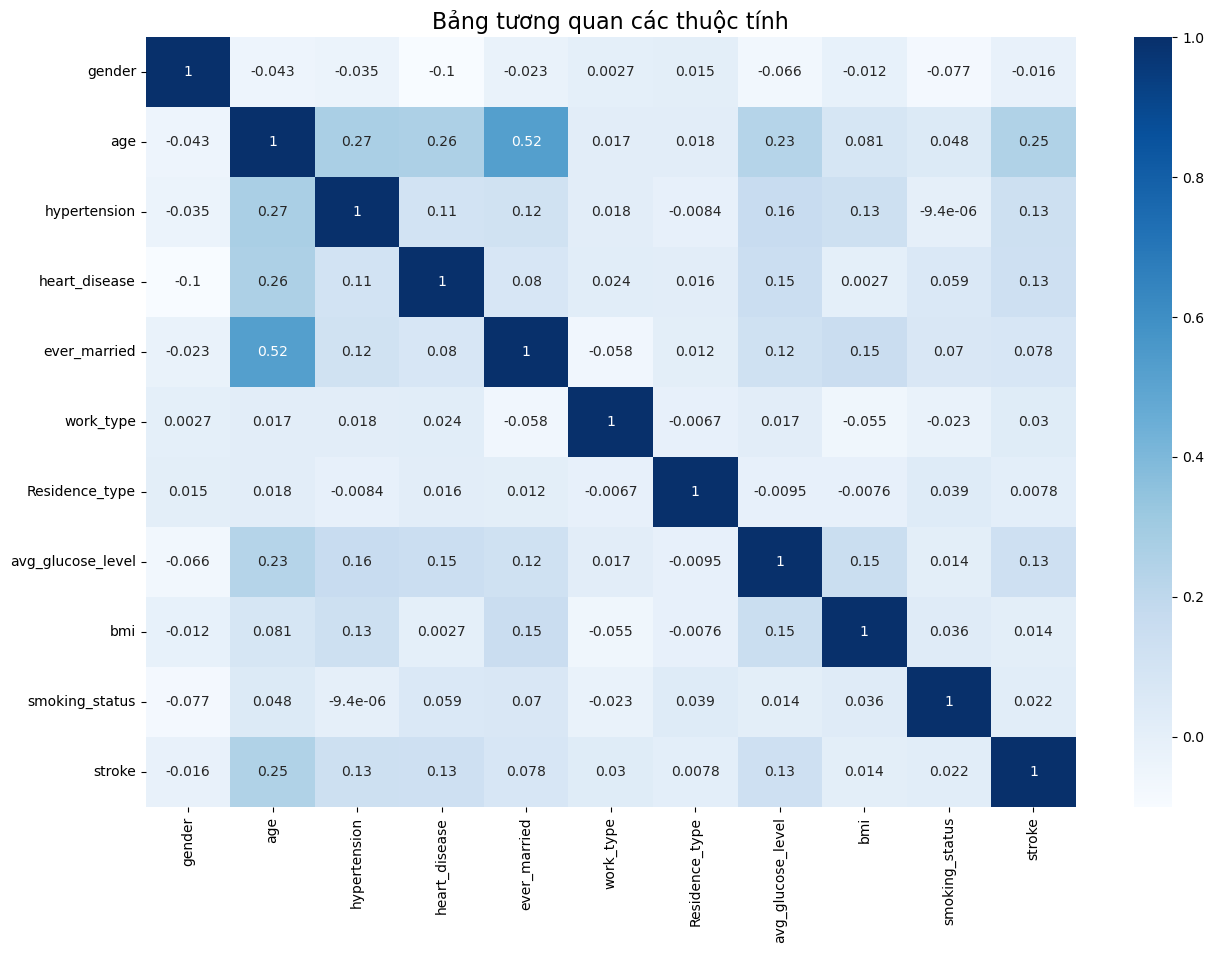

In [22]:
# Trực quan hóa dữ liệu bằng biểu đồ nhiệt
# thể hiện độ tương quan (Correlation) giữa tất cả các thuộc tính trong bảng. Màu càng đậm thì mối tương quan càng mạnh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#numeric_df = df.select_dtypes(include=[np.number])

corr = df.corr()
# plt.figure(figsize=(15,10))
# plt.title("Bảng tương quan các thuộc tính", frontsize = 16)
# sns.heatmap(corr, annot= True, cmap="Blues")

plt.figure(figsize=(15, 10))
plt.title("Bảng tương quan các thuộc tính", fontsize=16)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

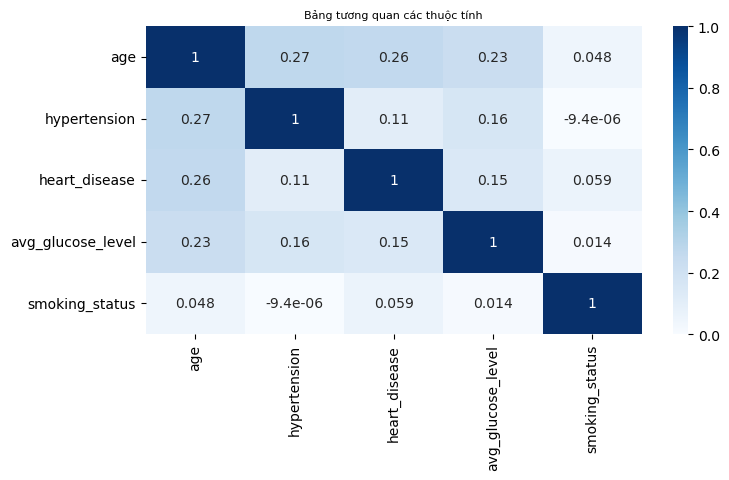

In [23]:
#Vẽ Heatmap nhưng chỉ tập trung vào các yếu tố chính ảnh hưởng đến đột quỵ như: [ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'smoking_status']
# Các yếu tố chính ảnh hưởng đến dột quỵ
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#numeric_df = df.select_dtypes(include=[np.number])

corr = df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'smoking_status']].corr()
# plt.figure(figsize=(15,10))
# plt.title("Bảng tương quan các thuộc tính", frontsize = 16)
# sns.heatmap(corr, annot= True, cmap="Blues")

plt.figure(figsize=(8, 4))
plt.title("Bảng tương quan các thuộc tính", fontsize=8)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

**Phần 4: Cân bằng dữ liệu**

In [24]:
# Dữ liệu đột quỵ thường bị mất cân bằng (người không bị bệnh > hơn người bị bệnh)
# Kết hợp cả Oversampling và Undersampling để cân bằng dữ liệu 
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Tách dữ liệu thành các biến đặc trưng (X) và biến mục tiêu (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các đối tượng Oversampling và Undersampling
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Tự động sinh thêm dữ liệu giả lập cho lớp bị thiếu (người bị đột quỵ)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Giảm bớt dữ liệu của lớp đa số.

# Tạo Pipeline kết hợp Oversampling và Undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Áp dụng pipeline trên dữ liệu huấn luyện
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Kiểm tra kích thước của dữ liệu sau khi cân bằng
print("Kích thước dữ liệu huấn luyện sau khi cân bằng:")
print(f"X_resampled: {X_resampled.shape}")
print(f"y_resampled: {y_resampled.shape}")

# Xem số lượng mẫu trong mỗi lớp sau khi cân bằng
print("Số lượng mẫu trong từng lớp sau khi cân bằng:")
print(y_resampled.value_counts())

# Kết hợp lại X_resampled và y_resampled để tạo thành một DataFrame hoàn chỉnh
df = pd.DataFrame(X_resampled, columns=X.columns)
df['stroke'] = y_resampled

# Xem trước dữ liệu sau khi cân bằng
df

Kích thước dữ liệu huấn luyện sau khi cân bằng:
X_resampled: (3037, 10)
y_resampled: (3037,)
Số lượng mẫu trong từng lớp sau khi cân bằng:
stroke
0    1687
1    1350
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1403,1.0,0.580247,0,0,1,0.500000,0,0.202890,0.125145,0.000000,0
1277,0.0,0.691358,0,0,1,0.500000,1,0.241760,0.210892,0.000000,0
1156,0.0,0.790123,0,0,1,0.500000,0,0.663466,0.253766,0.500000,0
845,0.0,0.543210,0,0,1,0.500000,0,0.014449,0.147161,1.000000,0
1286,1.0,0.456790,0,0,1,0.500000,0,0.225787,0.417149,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4045,1.0,0.978232,1,0,1,0.690804,0,0.089500,0.206135,0.000000,1
4046,0.0,0.970272,0,1,1,0.000000,0,0.367507,0.169909,0.000000,1
4047,1.0,0.825553,0,0,1,0.637080,1,0.238546,0.272075,0.500000,1
4048,1.0,0.851852,0,1,1,0.500000,0,0.125713,0.234142,0.436006,1


In [25]:
# xem số người bị đột quỵ trong bảng
dfff = df[df['stroke'] == 1]
print("Số người bị đột quỵ là " ) 
len(dfff)

Số người bị đột quỵ là 


1350

In [26]:
# xem số người KHÔNG bị đột quỵ trong bảng
dfff = df[df['stroke'] == 0]
print("Số người KHÔNG bị đột quỵ là " ) 
len(dfff)

Số người KHÔNG bị đột quỵ là 


1687

In [27]:
dfff = df[df['stroke'] == 0]
len(dfff)

1687

**Phần 5: Xây dựng mô hình học máy**

Ngưỡng tối ưu (Best Threshold): 0.5847
F1-Score tốt nhất: 0.9506

--- So sánh Hiệu suất ---
Mặc định (Threshold 0.5) - Recall: 0.9539877300613497
Tối ưu   (Threshold 0.58) - Recall: 0.9447852760736196


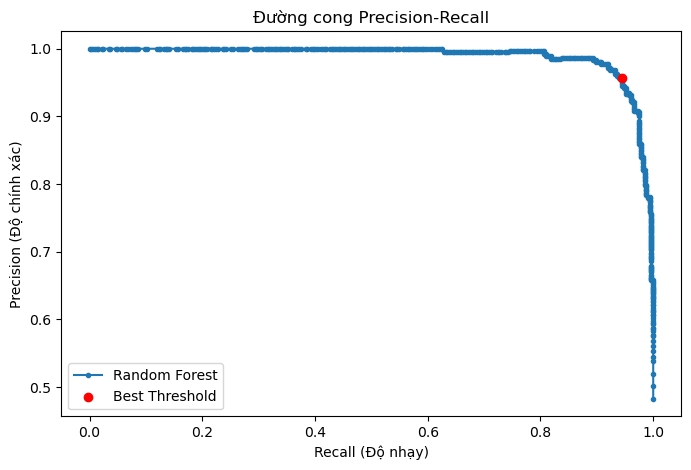

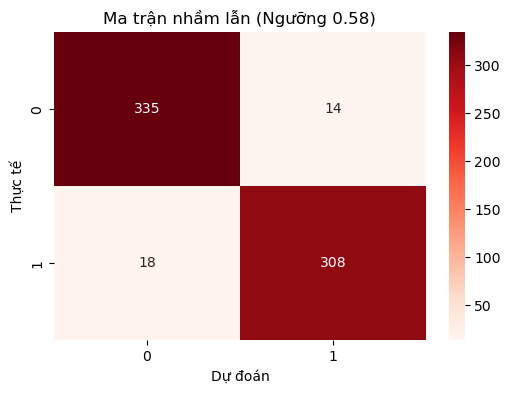

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, confusion_matrix

# 1. Huấn luyện lại với class_weight (Thay thế hoặc bổ trợ cho SMOTE)
# 'balanced' sẽ tự động tăng trọng số cho lớp thiểu số (người bị bệnh)
rf_optimized = RandomForestClassifier(
    n_estimators=600,
    max_depth=20,
    class_weight='balanced', # Quan trọng: Phạt nặng nếu đoán sai lớp bệnh
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train, y_train)

# 2. Dự đoán xác suất (Probability) thay vì nhãn (0/1)
y_pred_proba = rf_optimized.predict_proba(X_test)[:, 1]

# 3. Tìm ngưỡng (Threshold) tối ưu nhất cho F1-Score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Tính F1-score cho mọi ngưỡng
fscore = (2 * precision * recall) / (precision + recall)
# Tìm vị trí có F1 cao nhất
ix = np.argmax(fscore)
best_thresh = thresholds[ix]

print(f"Ngưỡng tối ưu (Best Threshold): {best_thresh:.4f}")
print(f"F1-Score tốt nhất: {fscore[ix]:.4f}")

# 4. Áp dụng ngưỡng mới để dự đoán
y_pred_new = (y_pred_proba >= best_thresh).astype(int)

# 5. So sánh kết quả
print("\n--- So sánh Hiệu suất ---")
print("Mặc định (Threshold 0.5) - Recall:", recall_score(y_test, rf_optimized.predict(X_test)))
print(f"Tối ưu   (Threshold {best_thresh:.2f}) - Recall:", recall_score(y_test, y_pred_new))

# Vẽ biểu đồ Precision-Recall để minh họa
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter(recall[ix], precision[ix], marker='o', color='red', label='Best Threshold', zorder=5)
plt.xlabel('Recall (Độ nhạy)')
plt.ylabel('Precision (Độ chính xác)')
plt.title('Đường cong Precision-Recall')
plt.legend()
plt.show()

# Vẽ Confusion Matrix mới
cm_new = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Reds')
plt.title(f'Ma trận nhầm lẫn (Ngưỡng {best_thresh:.2f})')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

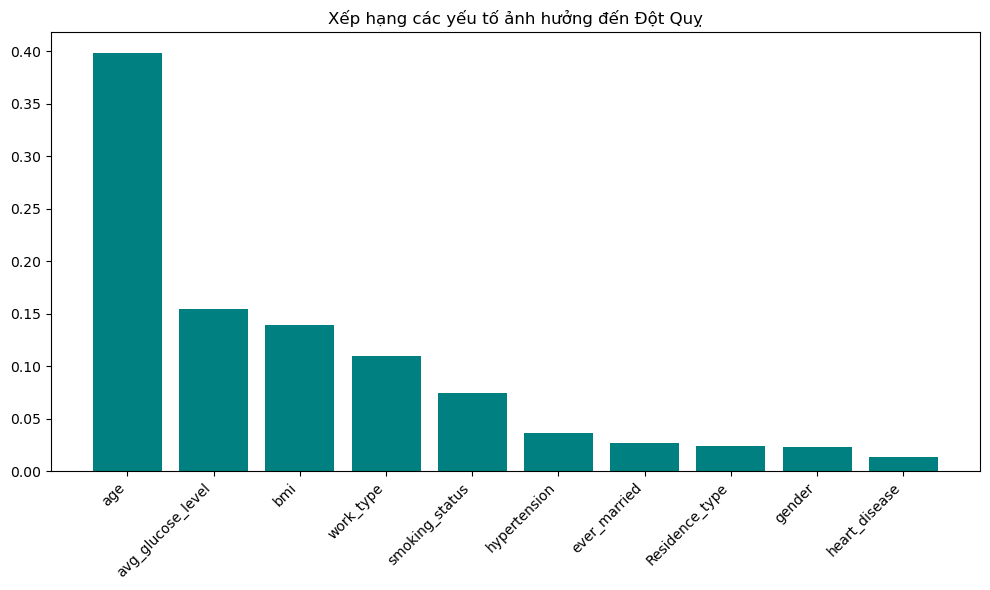

Top 3 yếu tố quan trọng nhất: ['age' 'avg_glucose_level' 'bmi']


In [36]:
# Lấy mức độ quan trọng
importances = rf_optimized.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # Sắp xếp giảm dần

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.title("Xếp hạng các yếu tố ảnh hưởng đến Đột Quỵ")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 3 yếu tố quan trọng nhất:", feature_names[indices][:3].values)

In [47]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Tạo bản sao để tránh ảnh hưởng dữ liệu gốc
X_train_encode = X_train.copy()
X_test_encode = X_test.copy()

# 2. Tìm tất cả các cột đang là kiểu 'object' (chữ)
object_cols = X_train_encode.select_dtypes(include=['object']).columns
print("Các cột cần mã hóa lại:", object_cols)

# 3. Mã hóa các cột này sang số
le = LabelEncoder()
for col in object_cols:
    # Chuyển sang dạng chuỗi để đảm bảo thống nhất (tránh lỗi mixed types)
    X_train_encode[col] = X_train_encode[col].astype(str)
    X_test_encode[col] = X_test_encode[col].astype(str)
    
    # Fit trên cả tập train và test để bao gồm tất cả các giá trị có thể có
    # (Lưu ý: trong thực tế nên fit trên train và handle unknown trên test, nhưng đây là cách nhanh nhất để fix lỗi hiện tại)
    le.fit(pd.concat([X_train_encode[col], X_test_encode[col]]))
    
    X_train_encode[col] = le.transform(X_train_encode[col])
    X_test_encode[col] = le.transform(X_test_encode[col])

print("Đã hoàn tất mã hóa dữ liệu.")

# 4. Huấn luyện lại XGBoost với dữ liệu đã xử lý
from xgboost import XGBClassifier
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=ratio,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_encode, y_train)

# 5. Dự đoán và đánh giá
y_pred_xgb = xgb_model.predict(X_test_encode)

print("\n--- Kết quả XGBoost ---")
print(classification_report(y_test, y_pred_xgb))

Các cột cần mã hóa lại: Index(['gender'], dtype='object')
Đã hoàn tất mã hóa dữ liệu.


C:\Users\dinhn\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [23:37:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Kết quả XGBoost ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       349
           1       0.93      0.94      0.94       326

    accuracy                           0.94       675
   macro avg       0.94      0.94      0.94       675
weighted avg       0.94      0.94      0.94       675

